[![IA NOTEBOOK #1 | Regresión Lineal y Mínimos Cuadrados Ordinarios | Programando IA](http://i3.ytimg.com/vi/w2RJ1D6kz-o/maxresdefault.jpg)](https://youtu.be/w2RJ1D6kz-o "IA NOTEBOOK #1 | Regresión Lineal y Mínimos Cuadrados Ordinarios | Programando IA")

# Regresion Lineal

* **Autor:** Carlos Santana Vega
* **Co-Autor:** Yesid Rosas Toro

En esta guia vamos a programar el Modelo de Regresión Lineal. Este es fundamental tanto para estadísticas como para Machine Learning, y además su estimación es muy sencilla. 

Para entender mejor lo que se quiere desarrollar es aconsejable mirar primero el video de [**Introduccion al tema**](https://youtu.be/k964_uNn3l0). Donde se estudiaran los conceptos basicos de la regresion lineal, asi como el ejemplo que aplicaremos a continuacion.

In [1]:
import numpy as np

from matplotlib import pyplot as plt

## Obteniendo un Dataset

El dataset implementado será la relacion de precio y cantidad de habitaciones de la ciudad de Boston.

> **Nota:** El dataset es obtenido de la libreria "*sklearn.datasets*"

En el siguiente fragmento de codigo se puede apreciar como se obtiene el dataset y se muestra ademas informacion respecto a este.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Interpretacion del Dataset

A continuacion se puede apreciar el grafico que describe la relacion de precio de un apartamento con respecto a su promedio de habitaciones. 

Cada punto viene a representar una casa. Hay que destacar que se disminuyo la opacidad de los puntos para interpretar mejor la acumulacion de estos en el plano.

> **Nota 1:** La variable "*Promedio de habitaciones por apartamento*" es extraida de la 6 columna(*indice 5*) de la matriz de datos "*boston.data*"

> **Nota 2:** La variable "*Precio medio de los apartamentos*" es extraida del vector "*target*"

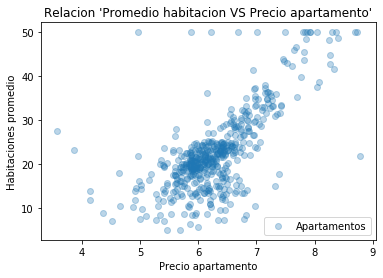

In [3]:
# Columna de promedio de habitaciones por apartamento
X = np.array(boston.data[:,5])

# Precio medio de los apartamentos
Y = np.array(boston.target)

plt.title("Relacion 'Promedio habitacion VS Precio apartamento'")

plt.scatter(X, Y, alpha=0.3)

plt.xlabel("Precio apartamento")
plt.ylabel("Habitaciones promedio")

plt.legend(['Apartamentos'])

plt.show()

## Formula Minima del Error Cuadratico (MCO)

Para hallar solucion a este problema, se busca simplemente trazar una linea que cruce por la mayor cantidad de puntos posibles. A simple vista parece sencillo trazar una linea recta sobre los puntos. Pero para hacer un calculo mas preciso se hace uso de la Formula Minima del Error Cuadratico para hallar los parametros que describen a nuestra recta.

$W = (X^{T}X)^{-1}X^{T}Y$

In [4]:
# Se agrega columna de 1s para termino independiente.
X_ = np.array([np.ones(len(X)), X]).T

W = np.linalg.inv(X_.T @ X_) @ X_.T @ Y
print(W)

[-34.67062078   9.10210898]


Como se puede notar, el resultado de la formula es un vector con 2 valores. Estos valores corresponden a el desplazamiento y la pendiente de una recta respectivamente. Es decir, los parametros necesarios para trazar una recta en el plano

**Ecuacion de la recta:**  $y = b + mx$

**Aplicando los valores:**  $y = -34.67062078 + 9.10210898x$

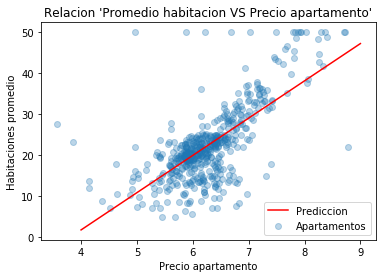

In [5]:
plt.title("Relacion 'Promedio habitacion VS Precio apartamento'")

x = np.linspace(4, 9, 10000)
y = W[0] + (W[1] * x)

plt.scatter(X, Y, alpha=0.3)
plt.plot(x, y, 'r')

plt.xlabel("Precio apartamento")
plt.ylabel("Habitaciones promedio")
plt.legend(['Prediccion', 'Apartamentos'])

plt.show()

## Sintesis

Ya que el objetivo es conseguir una recta, se hace uso de la ***Funcion polinomial*** que puede generar diferentes formulas. Entre los posibles resultados que puede generar la funcion polinomial es la formula de una recta que corresponde a una polinomial de grado 1. 

In [6]:
def polinomial(xp, yp):
    return xp ** yp

Una vez definamos la funcion que va a esbozar la recta. Comenzamos a crear el metodo que nos genere la matriz de caracteristicas $\phi$ de la siguiente forma:

$\phi(x, m, f) = f(x, m)$

In [7]:
def phi(x, m, fn):
    P = np.ones((len(x), len(m)))
    
    for i in range(len(x)):
        for j in range(len(m)):
            P[i][j] = fn(x[i], m[j])
            
    return P

Ahora, volvemos a recurrir a la formula minima del error cuadratico. Para generar el vector W siempre que sea necesario. Consideramos entonces que:

$W(\phi, x) = (\phi^{T}\phi)^{-1}\phi^{T}x$

In [8]:
def W(P, x):
    return np.linalg.inv(P.T @ P) @ P.T @ x

Finalmente, hacemos uso de estos metodos aplicandolo a nuestro problema. Definimos un valor $m$ que corresponde a la cantidad de caracteristicas a generar. Creamos un vector $v$ de dimension $m$ y generamos entonces una matriz de caracteristicas $\phi$ con estos atributos. Luego, obtenemos un vector $W$ a partir del resultado que arroja $\phi$ y el conjunto de entrenamiento $t$.

In [9]:
m = 2
x = np.array(boston.data[:,5])
v = np.arange(m)

P = phi(x, v, polinomial)

t = np.array(boston.target)

w = W(P, t)

Ahora que tenemos la matriz $\phi$ y el vector $W$ y sabiendo que:

$Y = \phi \cdot W$

Obtenemos nuestra recta $Y$ y mostramos sus valores en el plano.

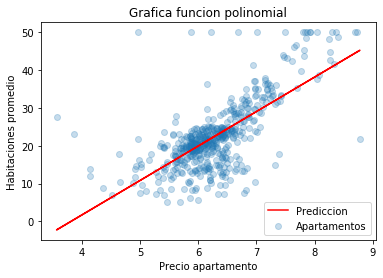

In [10]:
y = P @ w

plt.title("Grafica funcion polinomial")

plt.scatter(x, t, alpha=0.25)
plt.plot(x, y, 'r')

plt.xlabel("Precio apartamento")
plt.ylabel("Habitaciones promedio")
plt.legend(['Prediccion', 'Apartamentos'])

plt.show()

## Simplificacion

Usando la libreria **sklearn**

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

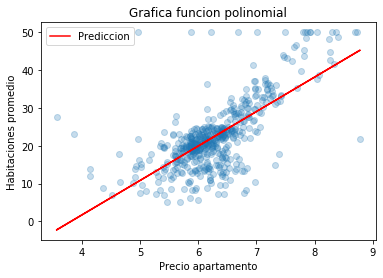

In [12]:
boston = load_boston()

x = np.array(boston.data[:,5])
m = np.linspace(0, 1, 2)

P = phi(x, m, polinomial)

t = np.array(boston.target)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(P, t)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y = regr.predict(P)
    
error = mean_squared_error(t, y)

plt.scatter(x, t, alpha=0.25)
plt.plot(x, y, 'r')

plt.title("Grafica funcion polinomial")
plt.xlabel("Precio apartamento")
plt.ylabel("Habitaciones promedio")
plt.legend(['Prediccion'])

plt.show()